## Logistic regression


### Multinomial classification

| x1 (hours) | x2 (attendance) | y (grade) |
|    :---:   | :---:          |  :---:    |
| 10        | 5 | A |
| 9         | 5 | A |
| 3         | 2 | B |
| 2 | 4 | B |
| 11 | 1 | C |

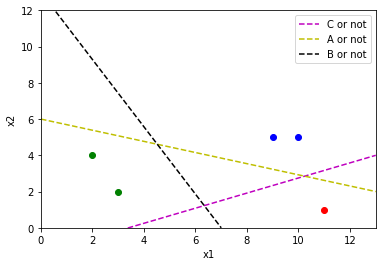

In [27]:
import matplotlib.pyplot as plt

A_hrs = [10, 9]
A_out = [5, 5]
B_hrs = [3, 2]
B_out = [2, 4]
C_hrs = [11]
C_out = [1]

plt.plot(A_hrs,A_out,'bo', B_hrs,B_out,'go', C_hrs,C_out,'ro')
plt.axis([0, 13, 0, 12])
plt.plot([1, 13],[-1, 4], 'm--', label='C or not')
plt.plot([0, 13],[6, 2], 'y--', label='A or not')
plt.plot([0, 7],[13, 0], 'k--', label='B or not')

plt.xlabel('x1')
plt.ylabel('x2')
plt.legend()
plt.show()

For many instances ...
$$ \begin{bmatrix} 
w_{A1} & w_{A2} & w_{A3} \\
w_{B1} & w_{B2} & w_{B3} \\
w_{C1} & w_{C2} & w_{C3} \\
\end{bmatrix} \cdot 
\begin{bmatrix} x_1 \\ x_2 \\ x_3  \end{bmatrix}
= 
 \begin{bmatrix} 
 w_{A1}x_1 + w_{A2}x_2 + w_{A3}x_3 \\
 w_{B1}x_1 + w_{B2}x_2 + w_{B3}x_3 \\
 w_{C1}x_1 + w_{C2}x_2 + w_{C3}x_3 \\
 \end{bmatrix}
 =
 \begin{bmatrix} Y_A \\ Y_B \\ Y_C  
 \end{bmatrix}  
 $$
  
Let 

$$ 
 \begin{bmatrix} Y_A \\ Y_B \\ Y_C  
 \end{bmatrix}  = \begin{bmatrix} 2.0 \\ 1.0 \\ 0.1  
 \end{bmatrix} 
 $$


#### Softmax
From Logistic classifier's Scores (e.g. [2., 1., 0.1]) 

===> 

To Probabilities (e.g. [0.7, 0.2, 0.1])

$$ XW = y$$
$$ S(y_i) = { e^{y_i} \over \sum_j e^{y_j}} $$


#### Cross-Entropy

From Probabilities (e.g. [0.7, 0.2, 0.1])

===> Arg MAX ===>

To Onr-Hot encodoing (e.g. [1.0, 0.0, 0.0] )

$$D(S,L) = -\sum_i L_i \cdot \log(S_i) $$


#### Logistic cost vs Cross-entropy

$$C(H(x), y) = y \log(H(x)) - (1-y)\log (1 -H(x)) $$

$$ D(S,L) = \sum_i L_i \log(S_i) $$

#### Cost function

$$
Loss = {1 \over N} \sum_i D (S(WX_i+ b), L_i) 
$$

#### Gradient Descent
$- \alpha \Delta L(w_1, w_2)$

### Lab 6-1

#### Softmax function

Logistic classifier's Scores (e.g. [2., 1., 0.1]) ===> Probabilities (e.g. [0.7, 0.2, 0.1])

$$ XW = y$$
$$ S(y_i) = { e^{y_i} \over \sum_j e^{y_j}} $$

In [61]:
import tensorflow as tf
x_data = [[1,2,1,1], [2,1,3,2], [3,1,3,4], [4,1,5,5], [1,7,5,5], [1,2,5,6], [1,6,6,6], [1,7,7,7]]
y_data = [[0,0,1], [0,0,1], [0,0,1], [0,1,0], [0,1,0], [0,1,0], [1,0,0], [1,0,0]]

X = tf.placeholder("float", [None, 4])
Y = tf.placeholder("float", [None, 3])

nb_classes = 3

W = tf.Variable(tf.random_normal([4, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits),  dim)
hypothesis = tf.nn.softmax(tf.matmul(X, W) + b)

# Cross Entropy cost/loss
cost = tf.reduce_mean(-tf.reduce_sum(Y * tf.log(hypothesis), axis=1))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2000):
        sess.run(optimizer, feed_dict={X:x_data, Y:y_data})
        if step % 500 == 0:
            print(step, sess.run(cost, feed_dict={X:x_data, Y:y_data}))

0 9.137173
500 0.58093035
1000 0.52953947
1500 0.4941489


In [70]:
hypothesis = tf.nn.softmax(tf.matmul(X,W) + b)

a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9]]})
                                        
#a = sess.run(hypothesis, feed_dict={X: [[1, 11, 7, 9],
#                                        [1, 3, 4, 3],
#                                        [1, 1, 0, 1]]})
#print(a, sess.run(tf.arg_max(a,1)))

RuntimeError: Attempted to use a closed Session.

### Lab 6-2 : Fancy Softmax Cassifier

softmax_cross_entropy_with_logits

In [58]:
import numpy as np

xy = np.loadtxt('./data/data-04-zoo.csv', delimiter=',', dtype=np.float32)
x_data = xy[:, 0:-1]
y_data = xy[:, [-1]]
X = tf.placeholder(tf.float32, [None, 16])
Y = tf.placeholder(tf.int32, [None, 1])

nb_classes = 7 # 0 ~ 6

Y_one_hot = tf.one_hot(Y, nb_classes)
Y_one_hot = tf.reshape(Y_one_hot, [-1, nb_classes])

W = tf.Variable(tf.random_normal([16, nb_classes]), name='weight')
b = tf.Variable(tf.random_normal([nb_classes]), name='bias')

# tf.nn.softmax computes softmax activations
# softmax = exp(logits) / reduce_sum(exp(logits),  dim)
logits = tf.matmul(X, W) + b
hypothesis = tf.nn.softmax(logits)

# Cross Entropy cost/loss
cost_i = tf.nn.softmax_cross_entropy_with_logits(logits=logits, labels=Y_one_hot)

cost = tf.reduce_mean(cost_i)
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

prediction = tf.argmax(hypothesis, 1)
correct_prediction = tf.equal(prediction, tf.argmax(Y_one_hot, 1))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

# Launch graph
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    
    for step in range(2000):
        sess.run(optimizer, feed_dict={X:x_data, Y:y_data})
        if step % 500 == 0:
            loss, acc = sess.run([cost, accuracy], feed_dict={X: x_data, Y: y_data})
            print("Step: {:5}\tLoss {:.3f}\tAcc: {:.2%}".format(step, loss, acc))
    pred = sess.run(prediction, feed_dict={X: x_data})
                                 
    for p, y in zip(pred, y_data.flatten()):
        print("[{}] Prediction: {} True Y: {}".format(p == int(y), p, int(y)))
                                 

Step:     0	Loss 3.117	Acc: 23.76%
Step:   500	Loss 1.074	Acc: 68.32%
Step:  1000	Loss 0.681	Acc: 78.22%
Step:  1500	Loss 0.513	Acc: 84.16%
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 3 True Y: 3
[False] Prediction: 3 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 6 True Y: 6
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 3 True Y: 3
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 1 True Y: 1
[True] Prediction: 0 True Y: 0
[True] Prediction: 1 True Y: 1
[True] Prediction: 5 True Y: 5
[False] Prediction: 6 True Y: 4
[False] Prediction: 6 True Y: 4
[True] Prediction: 0